In [8]:
from slvsh_tr import load_examples

# 一個目のデータを試しに表示

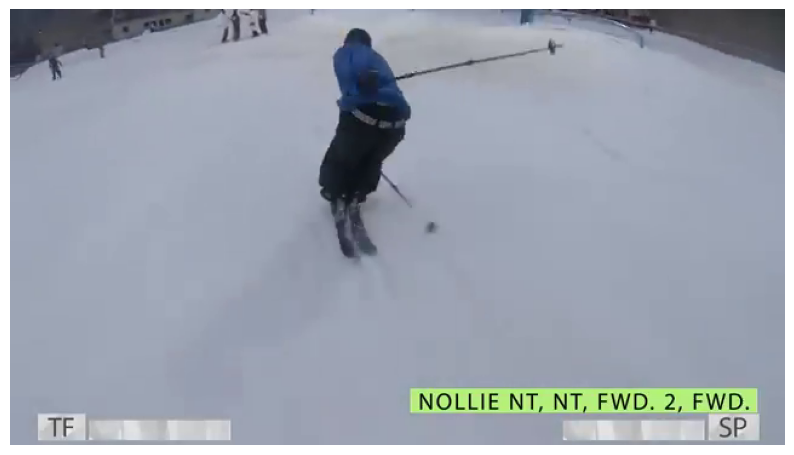

In [9]:
import cv2
import matplotlib.pyplot as plt

example = load_examples()[0]
image = cv2.imread(example.image_path)
# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(image_rgb)
plt.show()


# 試しに常に NOLLIE と予測するモデルを作る

In [10]:
from slvsh_tr import Recognizer

model = Recognizer.from_func(lambda image: "NOLLIE")
model.infer(image)

'NOLLIE'

# NOLLIE 5モデルを評価

In [11]:
from slvsh_tr import eval
import pandas as pd

result = eval(model)

# 評価結果をDataFrameに変換
df = pd.DataFrame([r.model_dump() for r in result])
df.mean()


Evaluating examples: 100%|██████████| 8/8 [00:00<00:00, 103.94it/s]


precision    0.125000
recall       0.011364
f1           0.020833
dtype: float64

# 評価結果の説明
- precision: 予測が正解に含まれている割合
- recall: 正解が予測に含まれている割合
- f1: precisionとrecallの調和平均，両方ともバランスとってみれる指標

例えば正解 "NOLLIE 2 BACK SWAP"
に "NOLLIE 2" と予測した場合
- Precision は 100%
- Recall は 50%
Recallが低い時は，なんか見逃してる

正解 "NOLLIE 2 BACK SWAP"に"NOLLIE 2 BACK SWAP SW"と予測した場合
- Precision は 80%
- Recall は 100%
Precisionが低い時は，間違ってる出力が出てる